In [10]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

ps:numpy.plot1d([1,2,3]) 生成1X2+2X1+3

In [11]:
#目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

#多项式
def fit_func(p,x):
    f = np.poly1d(p)
    return f(x)

#残差
def residuals_func(p,x,y):
    ret = fit_func(p,x) -y
    return ret

In [17]:
# 十个点
x= np.linspace(0,1,10)
x_points = np.linspace(0,1,1000)
#加上正态分布噪音的目标函数的值
y_ = real_func(x)
y= [np.random.normal(0,0.1) + y1 for y1 in y_]

def fitting(M=0):
    """
    M 为 多项式的次数
    """
    #随机初始化多项式参数
    p_init = np.random.rand(M+1)
    p_lsq = leastsq(residuals_func, p_init, args=(x,y))
    print('Fitting Parameters', p_lsq)
    #可视化
    plt.plot(x_points,real_func(x_points),label='real')
    plt.plot(x_points, fit_func(p_lsq[0],x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

# M = 0

Fitting Parameters (array([-0.01012369]), 1)


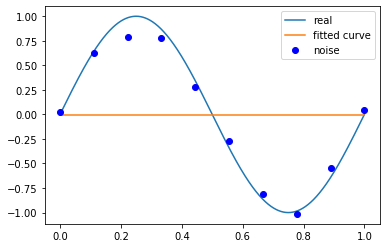

In [18]:
p_lsq_0 = fitting(M = 0)

# M=1

Fitting Parameters (array([-1.21783028,  0.59879145]), 1)


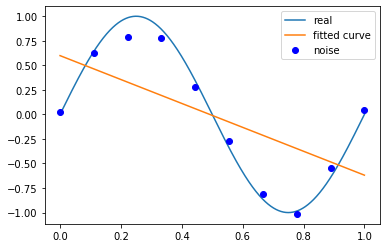

In [19]:
p_lsq_1 = fitting(M=1)

# M= 3

Fitting Parameters (array([ 19.30697369, -28.7039692 ,   9.51396834,  -0.03061139]), 1)


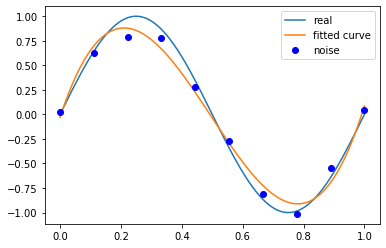

In [20]:
p_lsq_3 = fitting(M=3)

# M=9

Fitting Parameters (array([ 9.15493940e+03, -4.33818193e+04,  8.65495645e+04, -9.44755717e+04,
        6.13004335e+04, -2.39684593e+04,  5.44305401e+03, -6.58552867e+02,
        3.64362055e+01,  1.97282471e-02]), 2)


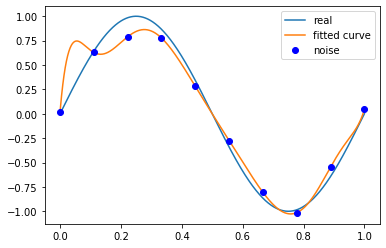

In [21]:
p_lsq_9 = fitting(M=9)

# 正则化
$Q(x) = \sum_{i=1}^n(h(x_i)-y_i)^2 + \lambda{\parallel w \parallel}^2$
回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数，也可以是L1范数

In [27]:
regularization = 0.0001

In [28]:
def residuals_func_regularization(p,x,y): 
    ret = fit_func(p,x) -y
    ret = np.append(ret, np.sqrt(0.5*regularization* np.square(p)))
    return ret

In [31]:
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization,p_init,args=(x,y))

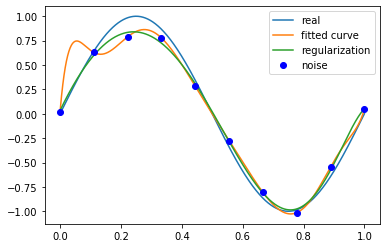

In [33]:
plt.plot(x_points, real_func(x_points), label = 'real')
plt.plot(x_points,fit_func(p_lsq_9[0],x_points), label='fitted curve')
plt.plot(x_points,fit_func(p_lsq_regularization[0],x_points), label = 'regularization')
plt.plot(x, y, 'bo',label = 'noise')
plt.legend()